# Data Preperation
starting with reading the CSV file and getting some general info about it.

In [1]:
import pandas as pd
data = pd.read_csv('2020 NSCH_Topical_CAHMI_DRC.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42777 entries, 0 to 42776
Columns: 831 entries, FIPSST to nom25ForgoneHC_20
dtypes: float64(1), int64(830)
memory usage: 271.2 MB


In [3]:
data.head()

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,npm15AdIns_20,nom14TthDec_20,nom17_1CSHCN_20,nom17_2sysCSHCN_20,nom17_3ASD_20,nom17_4ADHD_20,nom18MHlth_20,nom19ChHSt_20,nom20obese_20,nom25ForgoneHC_20
0,17,1,20000003,1,2,1,1,3,1,95,...,1,2,2,95,3,3,95,1,90,2
1,29,2,20000004,3,1,1,1,14,2,95,...,1,2,1,1,3,3,1,1,2,2
2,47,1,20000005,1,1,1,1,1,2,95,...,1,2,2,95,95,95,95,1,90,2
3,28,1,20000014,3,2,1,1,15,2,95,...,2,1,2,95,3,3,95,3,2,2
4,55,1,20000015,3,2,2,1,16,2,95,...,2,2,1,2,3,3,95,1,3,2


# 1. Data Cleansing 
This dataset includes diffrent areas of children's helath with around 42 thousand records, we are only concerned with data related to children with ADHD.

In [4]:
#deleting all irrelevant data columns except the ones we would need

keepColumns = ['HHID','SC_SEX','SC_AGE_YEARS','MEMORYCOND','K2Q31A','K2Q31B',
'K2Q31D','ADDTREAT','K6Q15','SESCURRSVC','K4Q36','WRITEPLAN','REPEATED',
'K2Q34C','K2Q36C','K2Q30C','K2Q31C','K5Q40','DISCUSSOPT','SC_K2Q17',
'K6Q71_R','K7Q84_R','K7Q85_R','K7Q82_R','K7Q83_R','ERRANDALONE',
'K7Q70_R','RECOGBEGIN','CLEAREXP','WRITENAME','RECSHAPES','DISTRACTED',
'WORKTOFIN','SIMPLEINST','PLAYWELL','NEWACTIVITY','HURTSAD','CALMDOWN',
'TEMPER','SITSTILL','RECOGABC','K5Q31_R','MAKEFRIEND','SC_K2Q10','SC_K2Q19'] #intital selection only 


data = data.filter(keepColumns)

In [5]:
data.head()
#reduced from 831 to 45 columns

,HHID,SC_SEX,SC_AGE_YEARS,MEMORYCOND,K2Q31A,K2Q31B,K2Q31D,ADDTREAT,K6Q15,SESCURRSVC,...,NEWACTIVITY,HURTSAD,CALMDOWN,TEMPER,SITSTILL,RECOGABC,K5Q31_R,MAKEFRIEND,SC_K2Q10,SC_K2Q19
0,20000003,1,3,90,2,95,95,95,2,95,...,5,1,3,4,3,4,3,1,2,2
1,20000004,2,14,2,2,95,95,95,2,95,...,90,90,90,90,90,90,3,1,1,2
2,20000005,2,1,90,2,95,95,95,2,95,...,95,95,95,95,95,95,3,95,2,2
3,20000014,2,15,2,2,95,95,95,2,95,...,90,90,90,90,90,90,95,1,2,2
4,20000015,2,16,2,2,95,95,95,2,95,...,90,90,90,90,90,90,3,2,1,2


In [6]:
#df.to_csv('NSCH_ADHD.csv')
#exporting the file after updating 

Now the dataset is finally redable we can clean the data properly.

In [7]:
data = data[data.K2Q31A == 1 ]
#delete every row that do not have ADHD (1 = have ADD/ADHD, 2 = don't have)
data = data[(data.SC_AGE_YEARS >= 3) & (data.SC_AGE_YEARS < 18)]
#excluding children who are younger than 3 and older than 17

In [8]:
col_names = list(data.columns.values)
print(col_names)

['HHID', 'SC_SEX', 'SC_AGE_YEARS', 'MEMORYCOND', 'K2Q31A', 'K2Q31B', 'K2Q31D', 'ADDTREAT', 'K6Q15', 'SESCURRSVC', 'K4Q36', 'WRITEPLAN', 'REPEATED', 'K2Q34C', 'K2Q36C', 'K2Q30C', 'K2Q31C', 'K5Q40', 'DISCUSSOPT', 'SC_K2Q17', 'K6Q71_R', 'K7Q84_R', 'K7Q85_R', 'K7Q82_R', 'K7Q83_R', 'ERRANDALONE', 'K7Q70_R', 'RECOGBEGIN', 'CLEAREXP', 'WRITENAME', 'RECSHAPES', 'DISTRACTED', 'WORKTOFIN', 'SIMPLEINST', 'PLAYWELL', 'NEWACTIVITY', 'HURTSAD', 'CALMDOWN', 'TEMPER', 'SITSTILL', 'RECOGABC', 'K5Q31_R', 'MAKEFRIEND', 'SC_K2Q10', 'SC_K2Q19']


In [9]:
#Renaming columns to easily understood names
data.rename(columns = {'HHID':'UID', 'K2Q34C':'BH_sev', 'K2Q36C': 'DV_sev',
'K2Q30C':'LD_sev', 'K2Q31A':'ADHD', 'K2Q31B':'ADHD_C', 'K2Q31C':'ADHD_sev',
'K2Q31D':'ADHD_MED', 'K6Q15':'edu_plan','K4Q36':'got_thrp','K5Q40':'CARETIME',
'K6Q71_R':'INTEREST','K7Q84_R':'fnsh_task','K7Q85_R':'CALM',
'K7Q82_R':'DOWELL','K7Q83_R':'DO_HW','K7Q70_R':'ARGUES','K5Q31_R':'COMM',
'SC_K2Q10':'EXT_MED','SC_K2Q19':'get_thrp','SC_K2Q17':'lim_ability'}, inplace = True)

In [10]:
#Changing the order of columns
order = ['UID', 'SC_AGE_YEARS', 'SC_SEX','ADHD', 'ADHD_C',
 'ADHD_MED','EXT_MED','got_thrp','get_thrp','ADDTREAT','edu_plan','WRITEPLAN',
 'COMM','CARETIME','DISCUSSOPT','MEMORYCOND','fnsh_task', 'CALM', 'DOWELL', 
 'DO_HW','INTEREST', 'MAKEFRIEND','ARGUES','REPEATED','RECOGBEGIN', 'CLEAREXP', 
 'WRITENAME','RECSHAPES', 'DISTRACTED','ERRANDALONE','WORKTOFIN','SIMPLEINST', 
 'PLAYWELL', 'NEWACTIVITY','HURTSAD','CALMDOWN','TEMPER', 'SITSTILL', 'RECOGABC',
 'lim_ability','ADHD_sev','DV_sev', 'LD_sev','BH_sev',]  #column's new order
data = data.reindex(order, axis=1)

In [11]:
data.head()

,UID,SC_AGE_YEARS,SC_SEX,ADHD,ADHD_C,ADHD_MED,EXT_MED,got_thrp,get_thrp,ADDTREAT,...,HURTSAD,CALMDOWN,TEMPER,SITSTILL,RECOGABC,lim_ability,ADHD_sev,DV_sev,LD_sev,BH_sev
7,20000041,9,2,1,1,2,2,2,2,2,...,90,90,90,90,90,95,1,95,95,95
21,20000134,13,2,1,1,2,1,1,2,2,...,90,90,90,90,90,95,3,2,3,2
42,20000244,9,2,1,1,2,2,2,2,2,...,90,90,90,90,90,1,2,2,2,95
59,20000350,8,2,1,1,1,1,1,2,1,...,90,90,90,90,90,95,1,95,1,1
90,20000529,10,1,1,1,1,1,1,1,1,...,90,90,90,90,90,95,1,95,1,2


# 2. Handling missing values


The missing values in this dataset are represented using numerical codes, the codes are describe in the following table:

| Missing value code | Explanation |
| --- | --- |
| 95 | - Legitimate skip or doesn't apply |
| 99 | - No valid response |
| 90 | - The item was not included on the questionnaire |
| 98 | - The value is suppressed to protect the privacy of the respondent/child |

Each missing value will be handeled separately 

### 2.1 Explore data

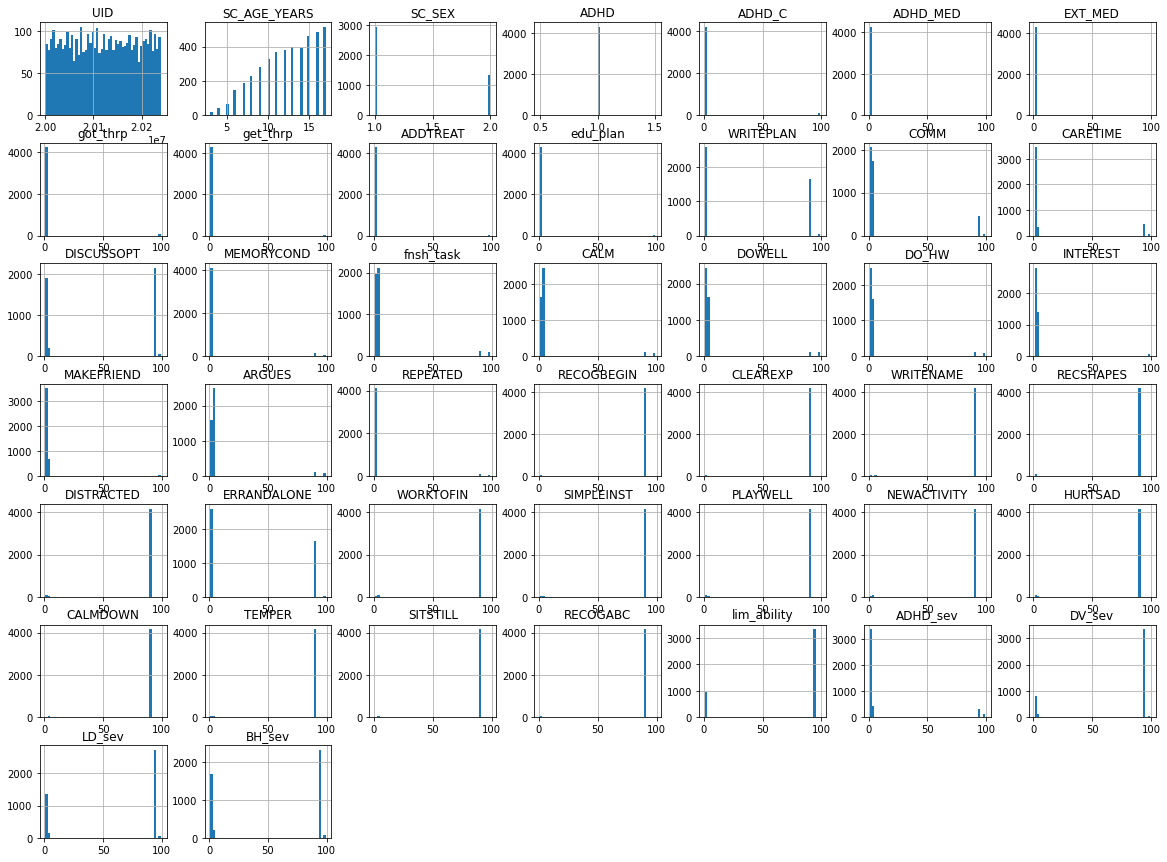

In [13]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
#displaying categories of values for each column
col_names = list(data.columns.values) #update columns names
col_names.remove('UID')
for i in col_names:
    print(data[i].value_counts(dropna=False)) 

17    516
16    488
15    464
13    400
14    390
12    378
11    368
10    326
9     279
8     226
7     186
6     149
5      66
4      40
3      17
Name: SC_AGE_YEARS, dtype: int64
1    2954
2    1339
Name: SC_SEX, dtype: int64
1    4293
Name: ADHD, dtype: int64
1     3880
2      319
99      94
Name: ADHD_C, dtype: int64
1     2311
2     1960
99      22
Name: ADHD_MED, dtype: int64
1     2830
2     1461
99       2
Name: EXT_MED, dtype: int64
2     2233
1     2005
99      55
Name: got_thrp, dtype: int64
2     3169
1     1123
99       1
Name: get_thrp, dtype: int64
2     2492
1     1784
99      17
Name: ADDTREAT, dtype: int64
1     2282
2     1996
99      15
Name: edu_plan, dtype: int64
90    1657
2     1486
1     1108
99      42
Name: WRITEPLAN, dtype: int64
3     1746
2     1071
1      990
95     453
99      33
Name: COMM, dtype: int64
1     2308
2     1139
95     453
3      296
4       52
99      45
Name: CARETIME, dtype: int64
95    2149
1     1370
2      528
3      159
99      45


### 2.2 Dropping columns with too many missing value

In [15]:
#to handle missing values drop any columns that exceeds the threshold value
threshold = 0.5
data = data.loc[:, data.apply(lambda s: s.isin([90, 99])).mean().lt(threshold)]


### 2.3 Filling the missing data

In [16]:
import numpy as np
fill = ['DV_sev','LD_sev','BH_sev','lim_ability','ADHD_sev']

#Replacing 95(who don't have development, behavior, learning problems, limited ability) with zero
for i in fill:
    data[i] = np.where(data[i] == 95, 0, data[i])


In [17]:
med_fill = ['ADHD_C', 'ADHD_MED', 'EXT_MED','got_thrp','get_thrp','ADDTREAT',
            'lim_ability','ADHD_sev','DV_sev','LD_sev','BH_sev','edu_plan',
            'WRITEPLAN','COMM','CARETIME','DISCUSSOPT','REPEATED','MEMORYCOND',
            'fnsh_task','CALM','DOWELL','DO_HW','INTEREST','MAKEFRIEND','ARGUES','ERRANDALONE']

#Replacing missing values with the median value for each column
for i in med_fill:
    median_value = int(data[i].median())
    data[i] = np.where(data[i] == 99, median_value, data[i])
    data[i] = np.where(data[i] == 90, median_value, data[i])
    data[i] = np.where(data[i] == 95, median_value, data[i])

#Replacing CARETIME column values with most frequent value
data['CARETIME'] = np.where(data['CARETIME'] == 95, 1, data['CARETIME'])

# 3 Visualize data

In [18]:
#dropping ADHD column since we don't need it anymore
del data['ADHD']

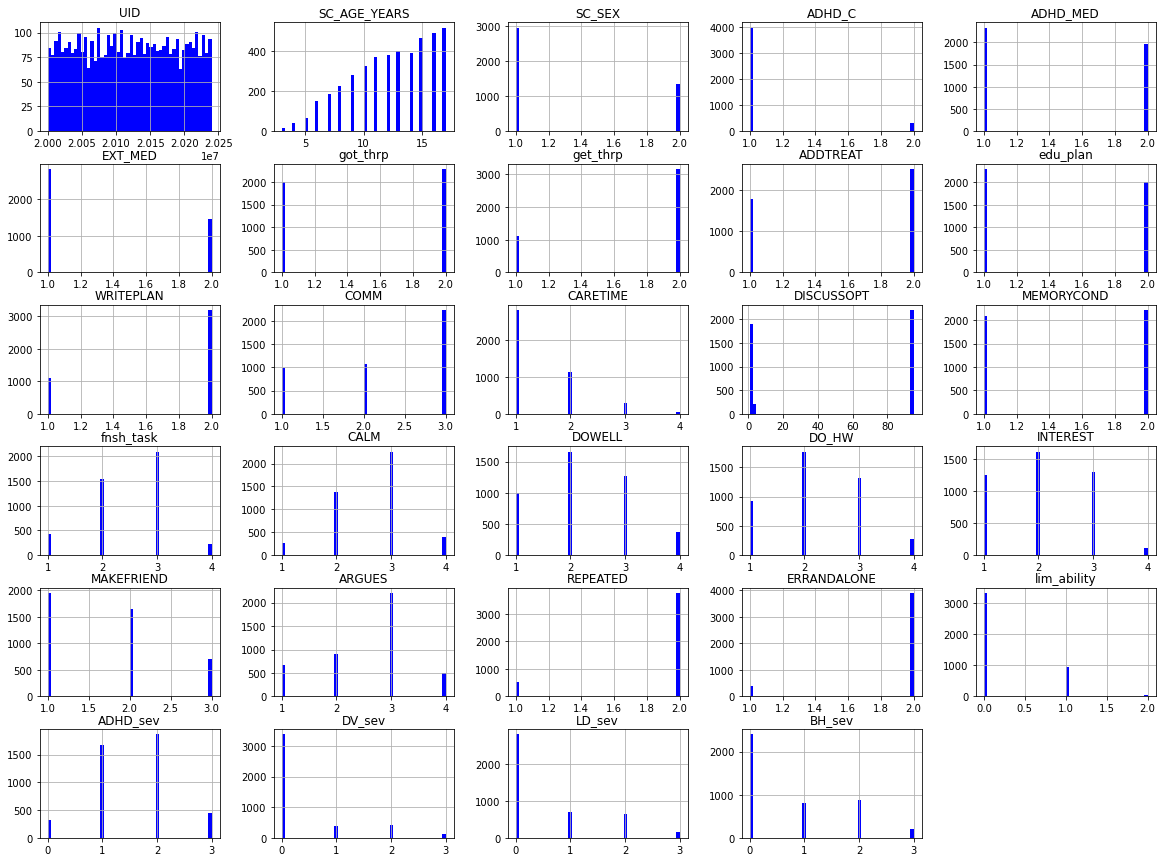

In [23]:
data.hist(bins=50, figsize=(20,15), color='blue')
plt.show()

In [24]:
data.corr()

,UID,SC_AGE_YEARS,SC_SEX,ADHD_C,ADHD_MED,EXT_MED,got_thrp,get_thrp,ADDTREAT,edu_plan,...,INTEREST,MAKEFRIEND,ARGUES,REPEATED,ERRANDALONE,lim_ability,ADHD_sev,DV_sev,LD_sev,BH_sev
UID,1.000000,0.023261,-0.036901,-0.010958,-0.015688,-0.028812,-0.004330,-0.001172,-0.001187,-0.006343,...,-0.016767,0.007367,0.005166,-0.032016,-0.020950,0.000128,0.008459,-0.013864,-0.011112,0.004830
SC_AGE_YEARS,0.023261,1.000000,0.012508,0.136838,0.007149,-0.034587,0.109298,0.273424,0.152302,-0.011553,...,0.176896,-0.012950,0.077217,-0.097800,-0.217916,-0.057161,-0.168113,-0.073434,0.016790,-0.234987
SC_SEX,-0.036901,0.012508,1.000000,-0.023959,0.036007,-0.028324,0.065876,0.048356,0.027991,0.051858,...,-0.022707,0.008660,-0.017244,0.015620,-0.002822,0.001965,-0.004249,-0.013678,0.024563,-0.062228
ADHD_C,-0.010958,0.136838,-0.023959,1.000000,0.294844,0.235130,0.064061,0.079716,0.192050,0.065322,...,-0.004709,-0.091523,0.068082,0.020485,0.039377,-0.076984,-0.572703,-0.079423,-0.124682,-0.169823
ADHD_MED,-0.015688,0.007149,0.036007,0.294844,1.000000,0.675058,0.025680,0.016720,0.192154,0.039109,...,-0.002546,-0.067141,0.058292,0.010416,0.033073,-0.044237,-0.346582,-0.023970,-0.036292,-0.178545
EXT_MED,-0.028812,-0.034587,-0.028324,0.235130,0.675058,1.000000,0.080155,0.066199,0.163734,0.073647,...,-0.044428,-0.132690,0.086078,0.016983,0.100304,-0.145891,-0.283985,-0.075905,-0.083991,-0.205144
got_thrp,-0.004330,0.109298,0.065876,0.064061,0.025680,0.080155,1.000000,0.464782,0.225291,0.517852,...,-0.069532,-0.319509,0.072300,0.093543,0.170923,-0.316996,-0.169992,-0.367426,-0.338744,-0.255524
get_thrp,-0.001172,0.273424,0.048356,0.079716,0.016720,0.066199,0.464782,1.000000,0.247706,0.316802,...,-0.029188,-0.297612,0.048464,0.070033,0.198298,-0.439355,-0.201627,-0.452967,-0.358309,-0.286575
ADDTREAT,-0.001187,0.152302,0.027991,0.192050,0.192154,0.163734,0.225291,0.247706,1.000000,0.201338,...,-0.038269,-0.233225,0.156588,0.026526,0.124906,-0.189258,-0.306395,-0.175553,-0.175920,-0.341187
edu_plan,-0.006343,-0.011553,0.051858,0.065322,0.039109,0.073647,0.517852,0.316802,0.201338,1.000000,...,-0.084792,-0.281168,0.061262,0.131449,0.181985,-0.276899,-0.175814,-0.353766,-0.402429,-0.209780


## 3.1 Visualize data correlation

<AxesSubplot:>

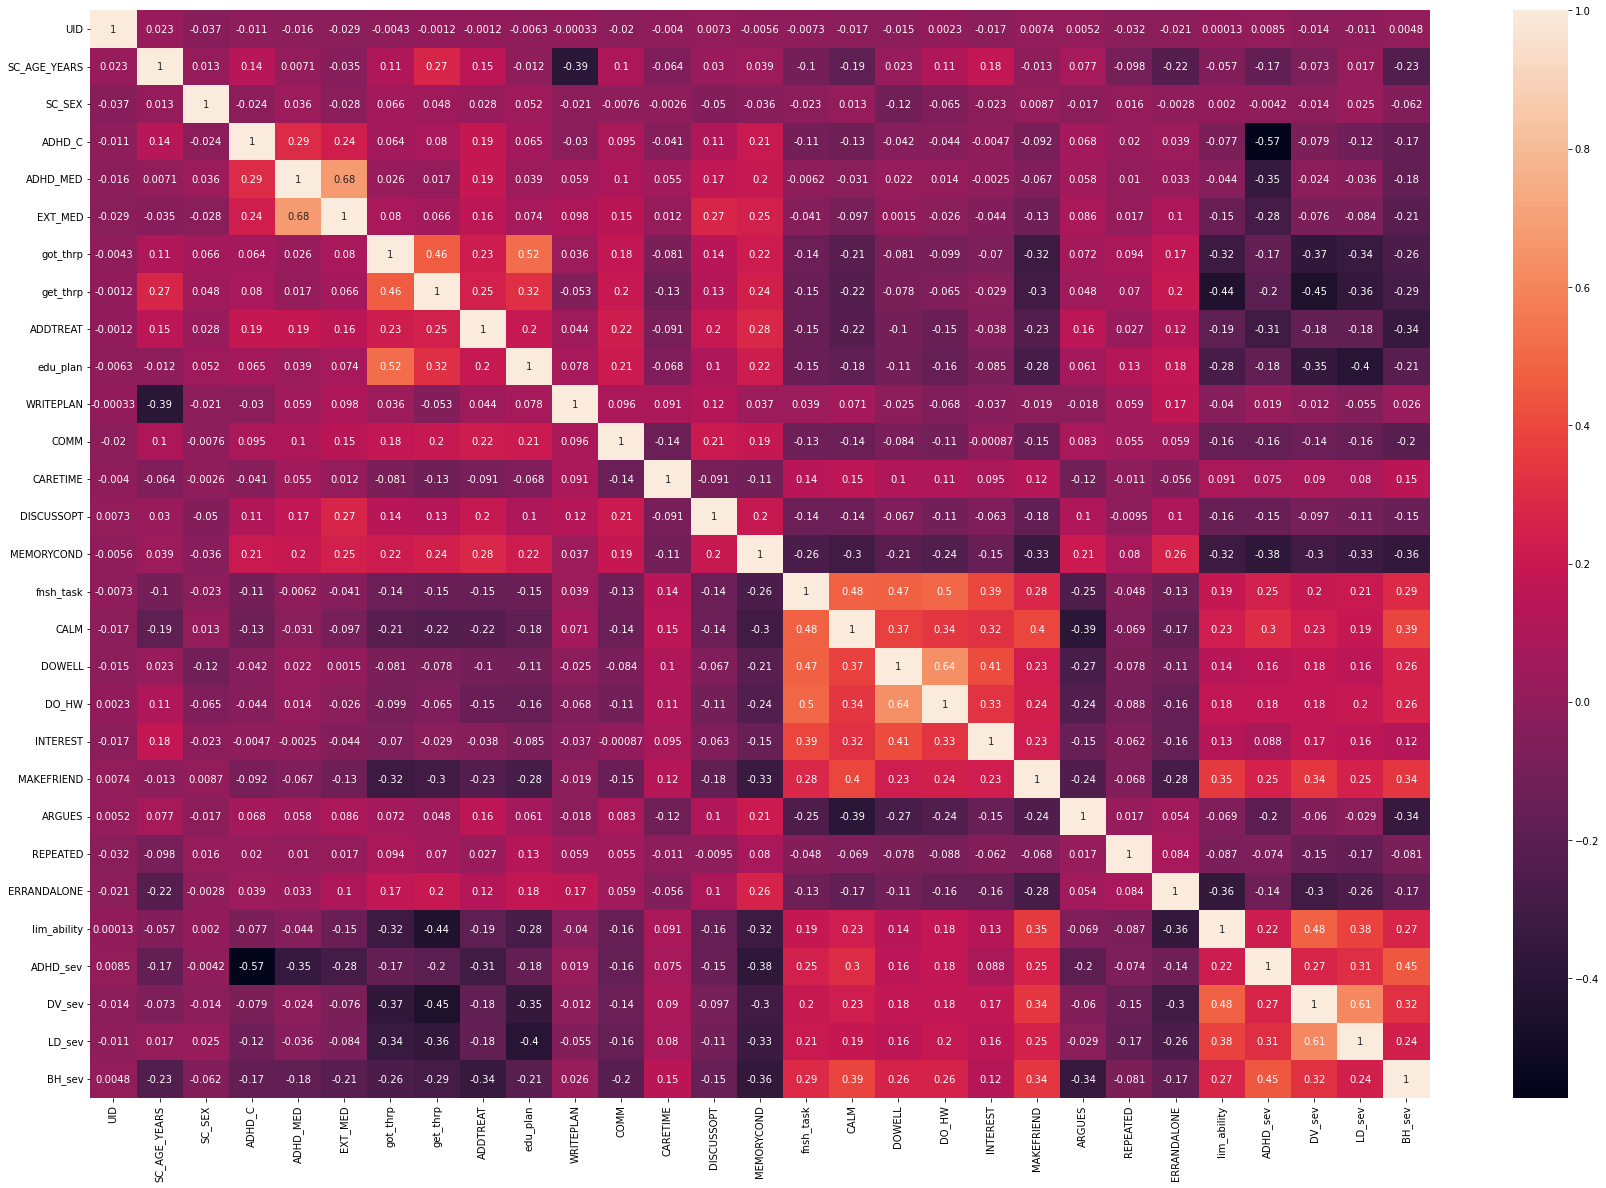

In [25]:
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)

In [12]:
#data.to_csv('NSCH_ADHD_DATASET.csv',index = None, header=True)